<a href="https://colab.research.google.com/github/sauravdarsh/MiniProject_5_Customer_Segmentation_Kmeans/blob/main/M2_NB_MiniProject_5_Customer_Segmentation_Kmeans_SK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Advanced Certification Program in Computational Data Science

##  A program by IISc and TalentSprint

### Mini Project Notebook: Customer segmentation using clustering

## Learning Objectives

At the end of the experiment, you will be able to :

* extract summary level insight from a given customer dataset.

* handle the missing data and identify the underlying pattern or structure of the data.

* create an unsupervised model that generates the optimum number of segments for the customer base

* identify customer segments based on the overall buying behaviour


## Dataset

The dataset chosen for this mini project is the Online Retail dataset. It is a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.

The dataset contains 541909 records, and each record is made up of 8 fields.

To know more about the dataset : [click here](https://archive.ics.uci.edu/ml/datasets/Online+Retail)

## Information

**Clustering** is the task of grouping together a set of objects so that the objects in the same cluster are more similar to each other than to objects in other clusters. Similarity is a measure that reflects the strength of the relationship between two data objects.

In the clustering calculation, K-Means is a very popular algorithm. In this analysis, this method is used to cluster the similar data items.

In Retail and E-Commerce (B2C), and more broadly in B2B, one of the key elements shaping the business strategy of a firm is understanding of customer behaviour. More specifically, understanding the customers based on different business metrics: how much they spend (revenue), how often they spend (frequency), are they new or existing customers, what are their favorite products, etc... Such understanding in turn helps direct marketing, sales, account management and product teams to support customers on a personalized level and improve the product offering.

Furthermore, segmenting customers into different categories based on similar/cyclical buying pattern over a period of 1 year helps the retail shops manage their inventory better, thereby lowering costs and raising revenues by placing the orders in sync with the buying cycles.

## Problem Statement

Perform customer segmentation for an Online Retail using an Unsupervised Clustering technique

## Grading = 10 Points

### Import Required packages

In [2]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import scipy
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

## Data Wrangling

In [3]:
#@title Download the data
!wget -qq https://cdn.iisc.talentsprint.com/CDS/MiniProjects/Online_Retail.zip
!unzip -qq Online_Retail.zip

## Load the data

In [4]:
df = pd.read_csv("Online_Retail_Train.csv")

## Data Pre-processing (2 points)

Explore the dataset by performing the following operations:

* There is a lot of redundant data. Identify such data and take appropriate action.

  **Hint:** refer to this [link](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop_duplicates.html)

* Most Invoices appear as normal transactions with positive quantity and prices, but there are some prefixed with "C" or "A" which denote different transaction types. Invoice starting with C represents cancelled order and A represents the Adjusted. Identify such data and take appropriate action.

  **Hint:** Check the negative values in Quantity column for all cancelled orders

* Handle the null values by dropping or filling with appropriate mean


* Some of the transactions based on the `StockCode` variable are not actually products, but representing the costs or fees regarding to the post or bank or other tansactions. Find such data and handle it accordingly.

  Hint:
    - The transaction with `'POST' 'PADS' 'M' 'DOT' 'C2' 'BANK CHARGES'` as their `StockCodes` are considered as irrelevant transactions.

* Identify the outliers in the UntiPrice and Quantity and handle them accordingly.

  **Hint:** [link](https://kanoki.org/2020/04/23/how-to-remove-outliers-in-python/)

* Create a DayOfWeek column using `InvoiceDate`, Hint: pd.to_datetime()

**Note:** Perform all the above operations using a function to reuse and apply the same for test data.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 514813 entries, 0 to 514812
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    514813 non-null  object 
 1   StockCode    514813 non-null  object 
 2   Description  513428 non-null  object 
 3   Quantity     514813 non-null  int64  
 4   InvoiceDate  514813 non-null  object 
 5   UnitPrice    514813 non-null  float64
 6   CustomerID   386550 non-null  float64
 7   Country      514813 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 31.4+ MB


In [6]:
# Count the missing values in each column
missing_values = df.isnull().sum()

# Print the count of missing values
print(missing_values)

InvoiceNo           0
StockCode           0
Description      1385
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     128263
Country             0
dtype: int64


In [7]:
df1 = df.drop_duplicates()

In [8]:
df1.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,579427,22636,CHILDS BREAKFAST SET CIRCUS PARADE,2,2011-11-29 13:04:00,8.50,16479.0,United Kingdom
1,554092,21916,SET 12 RETRO WHITE CHALK STICKS,24,2011-05-22 12:41:00,0.42,17176.0,United Kingdom
2,577774,84692,BOX OF 24 COCKTAIL PARASOLS,6,2011-11-21 15:57:00,0.42,16712.0,United Kingdom
3,C571196,23350,ROLL WRAP VINTAGE SPOT,-12,2011-10-14 12:02:00,1.25,NaN,United Kingdom
4,546649,84509a,SET OF 4 ENGLISH ROSE PLACEMATS,1,2011-03-15 14:17:00,7.46,NaN,United Kingdom


In [9]:
search_results = df1['InvoiceNo'].str.contains('A')
df1[search_results]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
51050,A563187,B,Adjust bad debt,1,2011-08-12 14:52:00,-11062.06,NaN,United Kingdom
279008,A563185,B,Adjust bad debt,1,2011-08-12 14:50:00,11062.06,NaN,United Kingdom
405078,A563186,B,Adjust bad debt,1,2011-08-12 14:51:00,-11062.06,NaN,United Kingdom


In [10]:
search_results = df1['InvoiceNo'].str.contains('C')
df1[search_results]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
3,C571196,23350,ROLL WRAP VINTAGE SPOT,-12,2011-10-14 12:02:00,1.25,NaN,United Kingdom
34,C578367,22759,SET OF 3 NOTEBOOKS IN PARCEL,-12,2011-11-24 11:00:00,1.65,14640.0,United Kingdom
121,C573010,20979,36 PENCILS TUBE RED RETROSPOT,-11,2011-10-27 12:29:00,1.25,13735.0,United Kingdom
219,C570828,90059E,DIAMANTE HAIR GRIP PACK/2 RUBY,-6,2011-10-12 13:15:00,1.65,14911.0,EIRE
220,C563693,84050,PINK HEART SHAPE EGG FRYING PAN,-1,2011-08-18 13:04:00,1.65,17243.0,United Kingdom
...,...,...,...,...,...,...,...,...
514660,C574954,22720,SET OF 3 CAKE TINS PANTRY DESIGN,-3,2011-11-08 09:52:00,4.95,18223.0,United Kingdom
514692,C554029,22423,REGENCY CAKESTAND 3 TIER,-1,2011-05-20 13:54:00,12.75,12681.0,France
514696,C552805,21155,RED RETROSPOT PEG BAG,-6,2011-05-11 12:34:00,2.55,14149.0,United Kingdom
514700,C546870,M,Manual,-2,2011-03-17 16:07:00,2.50,14462.0,United Kingdom


In [11]:
# Drop the rows where quantity is adjusted
df1 = df1[~df1['InvoiceNo'].str.contains('A')]

In [12]:
# Adjust the quantity for cancelled
df1.loc[search_results, 'Quantity'] = -1 * df1.loc[search_results, 'Quantity']

In [13]:
search_results.info()

<class 'pandas.core.series.Series'>
Int64Index: 510059 entries, 0 to 514812
Series name: InvoiceNo
Non-Null Count   Dtype
--------------   -----
510059 non-null  bool 
dtypes: bool(1)
memory usage: 20.5 MB


In [14]:
df1.count()

InvoiceNo      510056
StockCode      510056
Description    508671
Quantity       510056
InvoiceDate    510056
UnitPrice      510056
CustomerID     381837
Country        510056
dtype: int64

In [15]:
# Count the missing values in each column
missing_values = df.isnull().sum()

# Print the count of missing values
print(missing_values)

InvoiceNo           0
StockCode           0
Description      1385
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     128263
Country             0
dtype: int64


In [16]:
# handling missing values
pandas_feature=['Description','CustomerID']
df1.dropna(subset=pandas_feature, inplace=True)

# Fill the remaining null values in the pandas feature with the mean value
mean_value = df1[pandas_feature].mean()
df1[pandas_feature].fillna(mean_value, inplace=True)

# Print the updated DataFrame
print(df1)

       InvoiceNo StockCode                         Description  Quantity  \
0         579427     22636  CHILDS BREAKFAST SET CIRCUS PARADE         2   
1         554092     21916     SET 12 RETRO WHITE CHALK STICKS        24   
2         577774     84692         BOX OF 24 COCKTAIL PARASOLS         6   
5         579668     23575             SNACK TRAY PAISLEY PARK         8   
7         547684     23176              ABC TREASURE BOOK BOX          8   
...          ...       ...                                 ...       ...   
514803    551891     21402                     RED  EGG  SPOON        24   
514806    548156     22652                   TRAVEL SEWING KIT         2   
514808    545682     22975          SPACEBOY CHILDRENS EGG CUP         3   
514809    559691     22089       PAPER BUNTING VINTAGE PAISLEY        12   
514812    546837    85014B              RED RETROSPOT UMBRELLA         3   

                InvoiceDate  UnitPrice  CustomerID         Country  
0       2011-11-29

<ipython-input-16-412f776fa63e>:6: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mean_value = df1[pandas_feature].mean()
<ipython-input-16-412f776fa63e>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[pandas_feature].fillna(mean_value, inplace=True)


In [ ]:
# Removing Rows
feature = 'StockCode'
df1 = df1.drop(df1[df1[feature].isin( ['POST', 'PADS', 'M', 'DOT', 'C2', 'BANK CHARGES'])].index)
# Equivalent Another Way
df1 = df1.query("StockCode not in ['POST', 'PADS', 'M', 'DOT', 'C2', 'BANK CHARGES']")

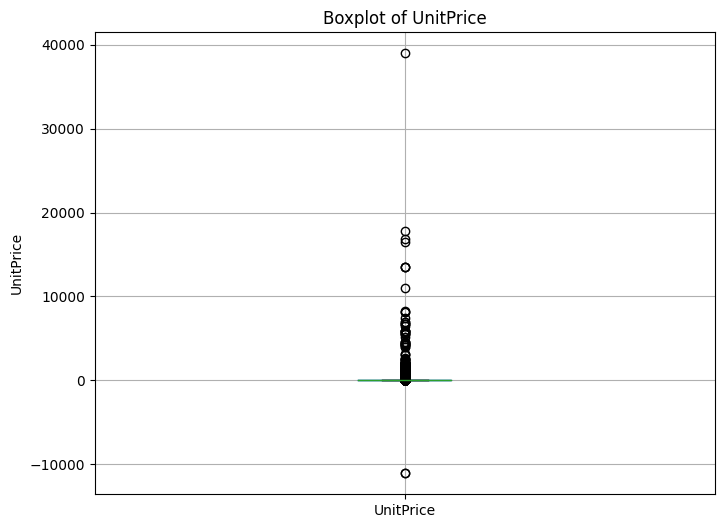

In [ ]:
# Create a boxplot using pandas
df.boxplot(column='UnitPrice', figsize=(8, 6))

# Set the title and labels
plt.title('Boxplot of UnitPrice')
plt.ylabel('UnitPrice')

# Show the plot
plt.show()

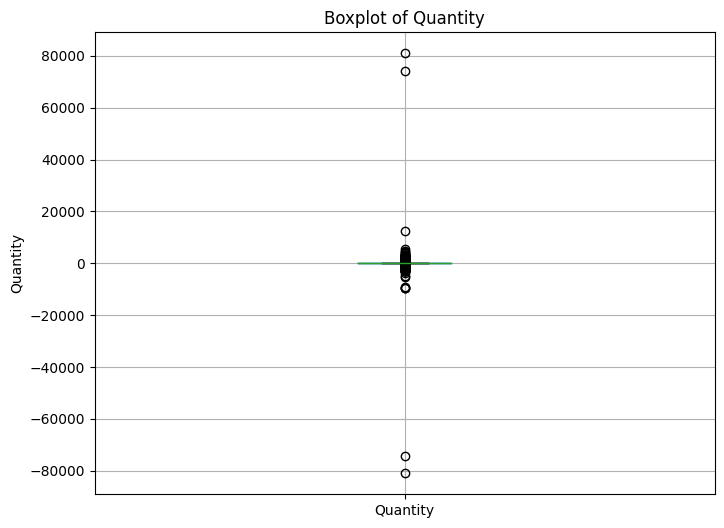

In [ ]:
# Create a boxplot using pandas
df.boxplot(column='Quantity', figsize=(8, 6))

# Set the title and labels
plt.title('Boxplot of Quantity')
plt.ylabel('Quantity')

# Show the plot
plt.show()

In [ ]:
df1= remove_outliers_iqr(df1, 'Quantity')


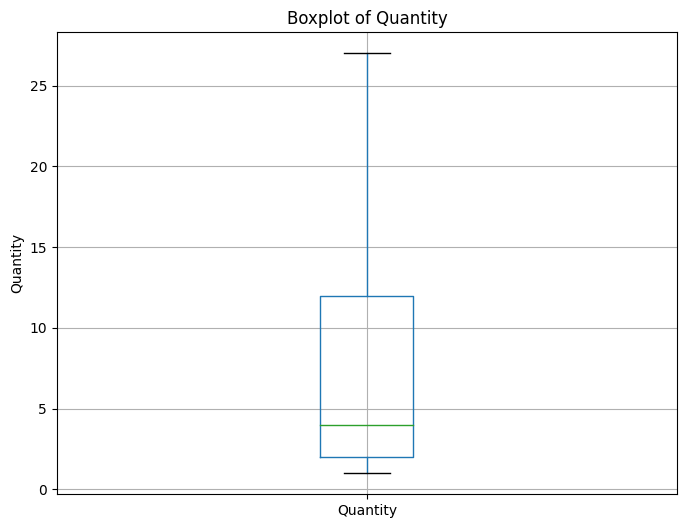

In [ ]:
# Create a boxplot using pandas
df1.boxplot(column='Quantity', figsize=(8, 6))

# Set the title and labels
plt.title('Boxplot of Quantity')
plt.ylabel('Quantity')

# Show the plot
plt.show()

In [ ]:
df1= remove_outliers_iqr(df1, 'UnitPrice')

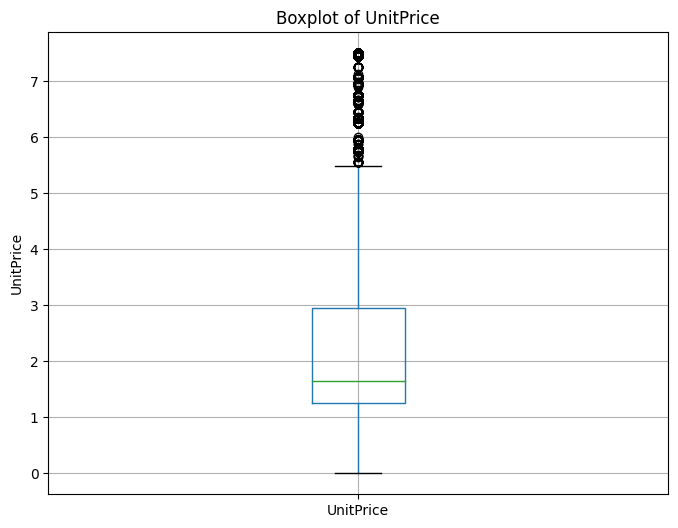

In [ ]:
# Create a boxplot using pandas
df1.boxplot(column='UnitPrice', figsize=(8, 6))

# Set the title and labels
plt.title('Boxplot of UnitPrice')
plt.ylabel('UnitPrice')

# Show the plot
plt.show()

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 316812 entries, 1 to 514812
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    316812 non-null  object 
 1   StockCode    316812 non-null  object 
 2   Description  316812 non-null  object 
 3   Quantity     316812 non-null  int64  
 4   InvoiceDate  316812 non-null  object 
 5   UnitPrice    316812 non-null  float64
 6   CustomerID   316812 non-null  float64
 7   Country      316812 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 21.8+ MB


In [ ]:
df1['DayOfWeek'] = pd.to_datetime(df['InvoiceDate']).dt.day_name()


In [ ]:
df1['DayOfWeek']

1            Sunday
2            Monday
5         Wednesday
7          Thursday
8            Friday
            ...    
514803     Thursday
514806      Tuesday
514808       Sunday
514809       Monday
514812     Thursday
Name: DayOfWeek, Length: 316812, dtype: object

In [1]:
def drop_duplicate_fill_mean(df, feature):
    # Drop the duplicate values in the pandas feature
    df.drop_duplicates(subset=[feature], inplace=True)

    # Fill the remaining null values in the pandas feature with the mean value
    mean_value = df[feature].mean()
    df[feature].fillna(mean_value, inplace=True)

    # Return the updated DataFrame
    return df

def drop_null_fill_mean(df, feature):
    # Drop the rows with null values in the pandas feature
    df.dropna(subset=[feature], inplace=True)

    # Fill the remaining null values in the pandas feature with the mean value
    mean_value = df[feature].mean()
    df[feature].fillna(mean_value, inplace=True)

    # Return the updated DataFrame
    return df

def adjust_feature_value(df, search_feature, target_feature, character):
    # Search for the character in the search feature
    df.loc[df[search_feature].str.contains(character), target_feature] *= -1

    # Return the updated DataFrame
    return df

def remove_rows_by_feature_value(data, feature, selected_values):
    # Remove rows based on feature values using isin
    data = data[~data[feature].isin(selected_values)]
    # Print the updated data
    print(data)

# Outlier removal based on Z Score
def remove_outliers(data, feature):
    # Calculate the z-score for the feature
    z_scores = (data[feature] - data[feature].mean()) / data[feature].std()

    # Define a threshold for outlier detection
    threshold = 3

    # Remove rows with z-scores greater than the threshold
    data = data[z_scores.abs() <= threshold]

    # Return the updated data
    return data

# Outlier removal based on IQR
def remove_outliers_iqr(data, feature):
    # Calculate the interquartile range for the feature
    q1 = data[feature].quantile(0.25)
    q3 = data[feature].quantile(0.75)
    iqr = q3 - q1

    # Define the lower and upper bounds for outlier detection
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    # Remove rows with values outside the bounds
    data = data[(data[feature] >= lower_bound) & (data[feature] <= upper_bound)]

    # Return the updated data
    return data

def identify_outliers_by_boxplot(data, feature):
    # Calculate the interquartile range (IQR) for the feature
    q1 = data[feature].quantile(0.25)
    q3 = data[feature].quantile(0.75)
    iqr = q3 - q1

    # Define the lower and upper bounds for outlier detection
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    # Identify outliers based on the boxplot method
    outliers = data[(data[feature] < lower_bound) | (data[feature] > upper_bound)]

    # Return the outliers
    return outliers

def create_day_of_week_column(dataframe):
    dataframe['InvoiceDate'] = pd.to_datetime(dataframe['InvoiceDate'])
    dataframe['DayOfWeek'] = dataframe['InvoiceDate'].dt.day_name()
    return dataframe


## Understanding new insights from the data (1 point)

1.  Are there any free items in the data? How many are there?

2.  Find the number of transactions per country and visualize using an appropriate plot

3.  What is the ratio of customers who are repeat purchasers vs single-time purchasers? Visualize using an appropriate plot.

4. Plot heatmap showing unit price per month and day of the week

  **Hint:** Month name as index on Y-axis, Day of the week on X-axis

5. Find the top 10 customers who bought the most no.of items. Also find the top 10 Items bought by most no.of customers.

In [17]:
df1.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,579427,22636,CHILDS BREAKFAST SET CIRCUS PARADE,2,2011-11-29 13:04:00,8.50,16479.0,United Kingdom
1,554092,21916,SET 12 RETRO WHITE CHALK STICKS,24,2011-05-22 12:41:00,0.42,17176.0,United Kingdom
2,577774,84692,BOX OF 24 COCKTAIL PARASOLS,6,2011-11-21 15:57:00,0.42,16712.0,United Kingdom
5,579668,23575,SNACK TRAY PAISLEY PARK,8,2011-11-30 12:32:00,1.95,15152.0,United Kingdom
7,547684,23176,ABC TREASURE BOOK BOX,8,2011-03-24 14:46:00,2.25,12408.0,Belgium


In [ ]:
#Are there any free items in the data? How many are there?

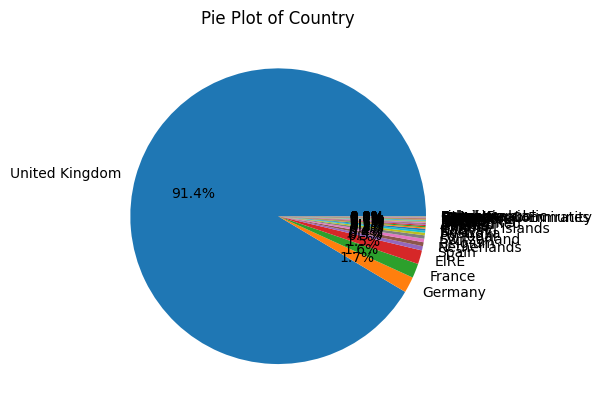

In [21]:
#Find the number of transactions per country and visualize using an appropriate plot
# Count the occurrences of each unique value in the feature column
value_counts = df['Country'].value_counts()

# Generate the pie plot
plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%')

# Add a title to the plot
plt.title('Pie Plot of Country')

# Add labels to the plot
#plt.legend(value_counts.index, loc='best')

# Add labels to the plot with arrows
for i, (label, count) in enumerate(zip(value_counts.index, value_counts)):
    angle = 360 * count / sum(value_counts)
    x = 0.5 * plt.rcParams['figure.figsize'][0] * np.cos(np.pi / 180 * (angle - 0.5 * angle))
    y = 0.5 * plt.rcParams['figure.figsize'][1] * np.sin(np.pi / 180 * (angle - 0.5 * angle))
    plt.annotate(label, (x, y), xytext=(1.35*np.sign(x), 1.4*y), arrowprops=dict(arrowstyle="->"))


# Add labels to the plot with arrows
for wedge, label in zip(wedges, value_counts.index):
    angle = (wedge.theta2 - wedge.theta1) / 2. + wedge.theta1
    x = np.cos(np.deg2rad(angle))
    y = np.sin(np.deg2rad(angle))
    x_text = np.cos(np.deg2rad(angle)) * 1.2
    y_text = np.sin(np.deg2rad(angle)) * 1.2
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = f"angle, angleA=0, angleB={angle}"
    ax.annotate(label, (x, y), xytext=(x_text, y_text), textcoords="data",
                horizontalalignment=horizontalalignment, arrowprops=dict(arrowstyle="->", connectionstyle=connectionstyle))

# Display the plot
plt.show()

In [ ]:
#What is the ratio of customers who are repeat purchasers vs single-time purchasers? Visualize using an appropriate plot.

In [ ]:
#Plot heatmap showing unit price per month and day of the week

In [ ]:
#Find the top 10 customers who bought the most no.of items. Also find the top 10 Items bought by most no.of customers.

## Feature Engineering and Transformation (2 points)

### Create new features to uncover better insights and drop the unwanted columns

* Create a new column which represents Total amount spent by each customer

    **Hint:** Quantity * UnitPrice

* Customer IDs are seen to be repeated. Maintain unique customer IDs by grouping and summing up all possible observations per customer.

    **Hint:** [pandas.groupby.agg](https://pandas.pydata.org/pandas-docs/version/0.22/generated/pandas.core.groupby.DataFrameGroupBy.agg.html)

**Note:** Perform the above operations in function, to reuse and apply the same for test data

In [ ]:
# YOUR CODE HERE

### Scale the data

Apply `StandardScaler` on the features.

In [ ]:
# YOUR CODE HERE for scaling

## Clustering ( 5 points)

### Apply k-means algorithm to identify a specific number of clusters


* Fit the k-means model

* Extract and store the cluster centroids

Below are the parameters for k-means, which are helpful

**n_clusters** is no. of clusters specified

**k-means++** is a random initialization method for centroids to avoid random initialisation trap

**max_iter** is max no of iterations defined when k-means is running

**n_init** is no. of times k-means will run with different initial centroids

[why-is-k-means-slower-than-random-initialization-k-means](https://stats.stackexchange.com/questions/185396/why-is-k-means-slower-than-random-initialization-k-means/185422)

In [ ]:
# YOUR CODE HERE to apply KMeans

#### Find the optimal number of clusters (K) by using the [Elbow method](https://pythonprogramminglanguage.com/kmeans-elbow-method/).

Use the optimal no. of clusters and store the cluster centroids

In [ ]:
# YOUR CODE HERE

### Apply DBSCAN algorithm for clustering

- Compare the results of clusters from k-means and DBSCAN


In [ ]:
# YOUR CODE HERE

### Analyze the clusters


- consider two features and visualize the clusters with different colors using the predicted cluster centers.

  **Hint:** 2D plot

- consider three features and visualize the clusters with different colors using the predicted cluster centers.

  **Hint:** [3D plot](https://matplotlib.org/stable/gallery/mplot3d/scatter3d.html
)

In [ ]:
# YOUR CODE HERE

### Train a supervised algorithm on clustered data

This will allow us to predict cluster numbers (label) for each test data instance

* Create labelled data with k-means cluster labels
  
  **Hint**: [`kmeans.labels_`](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
)
* Split the data into train and validation sets
* Train a supervised algorithm on the train data
* Find the accuracy of the model using validation data

In [ ]:
# YOUR CODE HERE

### Evaluation of Test Data
* Use the model to predict the labels for the Test data below
* Format the test data in the same format as the train data.
* Predict it with trained supervised ML model

In [ ]:
# Test set provided as below
test = pd.read_csv("Online_Retail_Test.csv")
test.head(3)

In [ ]:
# YOUR CODE HERE

### Report Analysis

- Discuss the pros and cons of removing the missing values vs replacing with the mean values
- Based on the visualization of clusters, comment on the difference in buying patterns of each cluster
- What other methods could be used to determine the optimal no. of clusters?